In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# load and inspect columns and their values
df = pd.read_csv(
  '/content/Metro_Interstate_Traffic_Volume.csv',
  parse_dates=['date_time'],
  index_col='date_time',
)
df # <-- we don't use head because we want to see the start and the end of the series

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
df = df.drop(columns = ['holiday'], axis=1)

In [ ]:
df.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
df.duplicated().sum()

29

In [ ]:
# df.drop_duplicates()

In [ ]:
# df.head()

In [ ]:
df.isnull().sum()

,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
traffic_volume,0


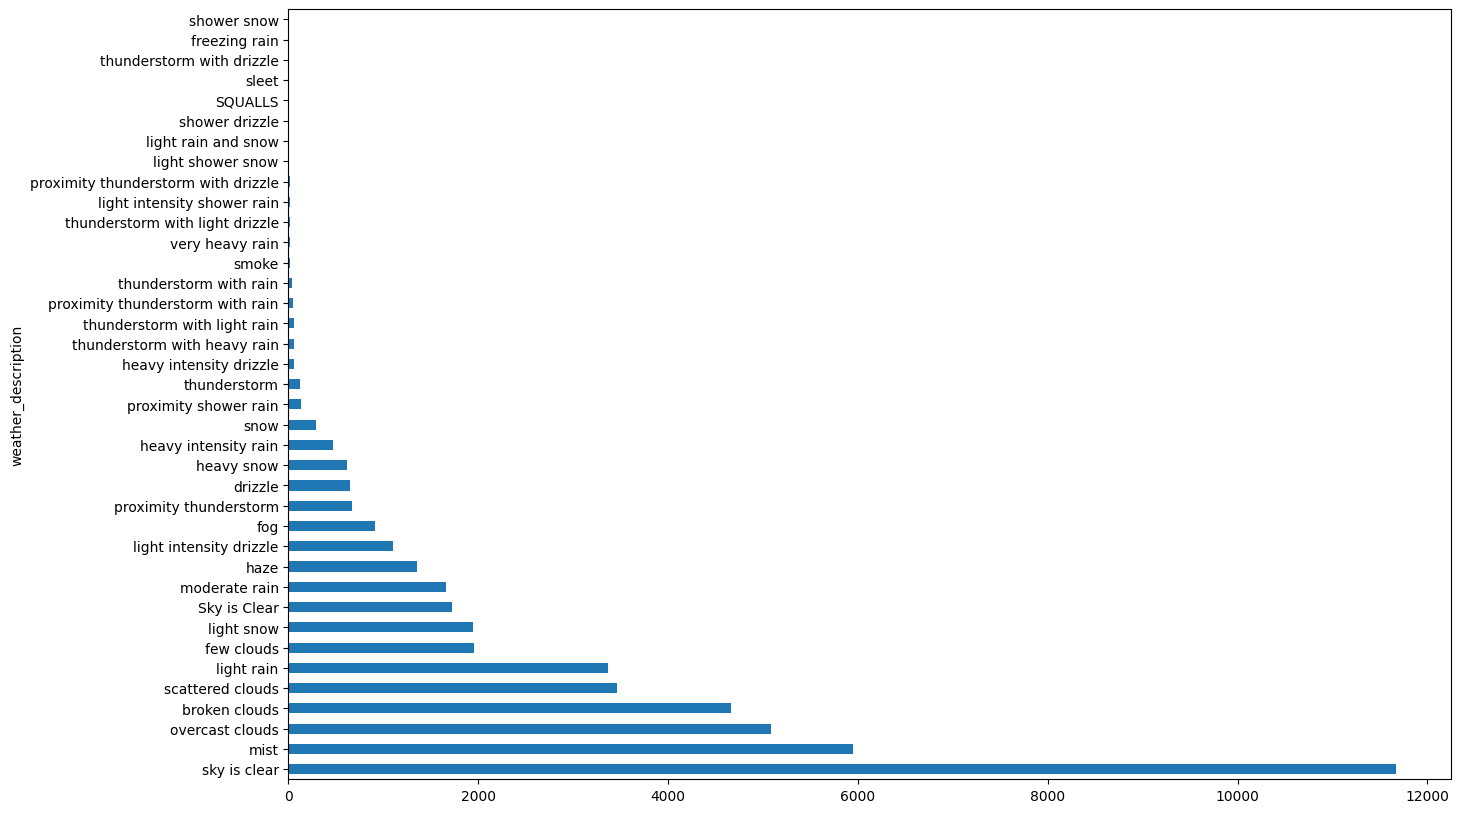

In [ ]:
plt.figure(figsize=(15,10))
df['weather_description'].value_counts().plot.barh()
plt.show()

In [ ]:
df['temp'].value_counts()

,count
temp,
274.150,128
275.150,89
274.080,85
276.793,78
291.150,73
...,...
260.970,1
277.240,1
270.190,1


In [ ]:
df['rain_1h'].value_counts()

,count
rain_1h,
0.00,44737
0.25,948
0.51,256
1.02,123
0.30,121
...,...
1.28,1
1.47,1
4.66,1


<Axes: xlabel='snow_1h'>

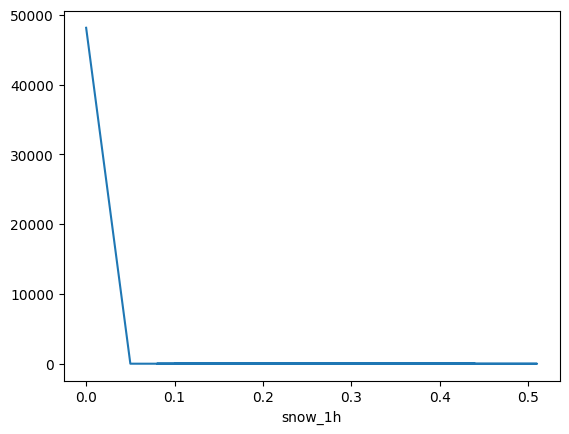

In [ ]:
df['snow_1h'].value_counts().plot()

In [ ]:
df['clouds_all'].value_counts()

,count
clouds_all,
90,16442
1,12761
75,5069
40,3993
0,1988
20,1849
64,1558
5,1094
92,776


<Axes: xlabel='weather_main'>

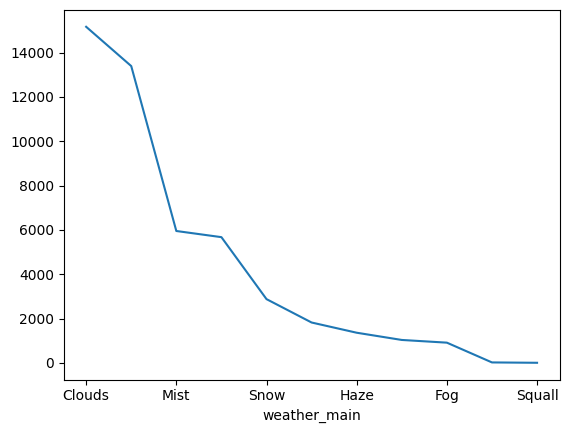

In [ ]:
df['weather_main'].value_counts().plot()

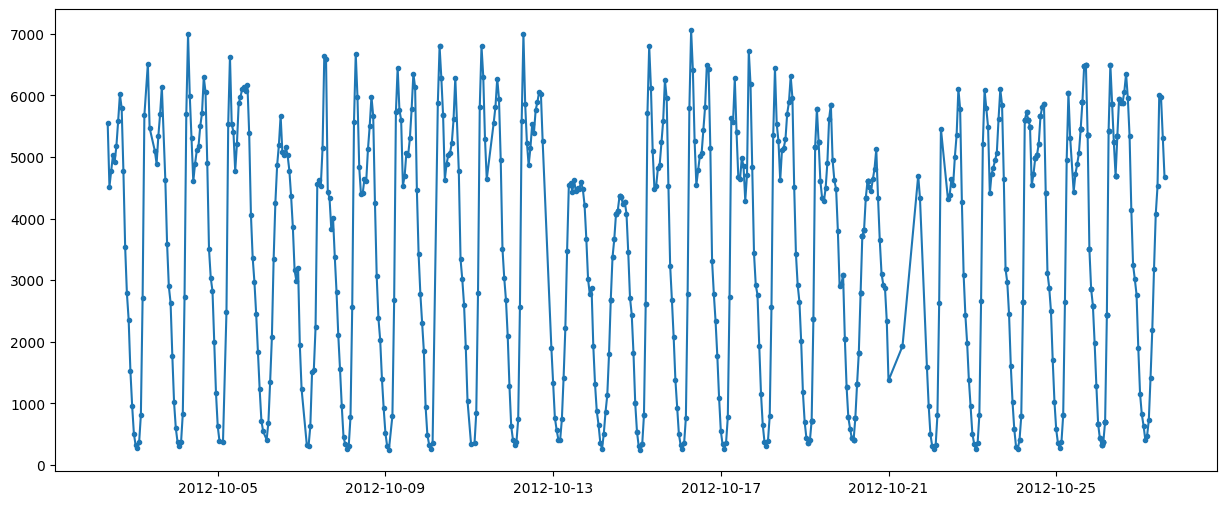

In [ ]:
df_specific = df.iloc[:700]
plt.figure(figsize=(15, 6))
plt.plot(df_specific.index, df_specific['traffic_volume'], marker='.')
plt.show() # we notice there is a weekly pattern

In [ ]:
df.index

DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=48204, freq=None)

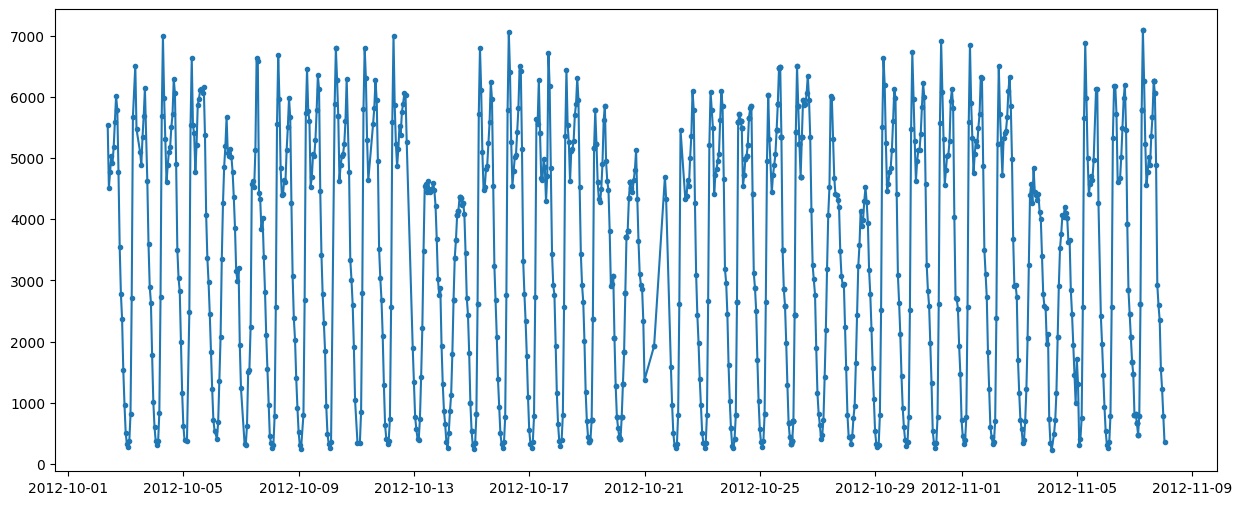

In [ ]:
# show me how to plot with a big picture.
df_specific = df.iloc[:1000]
plt.figure(figsize=(15, 6))
plt.plot(df_specific.index, df_specific['traffic_volume'], marker='.')
plt.show()


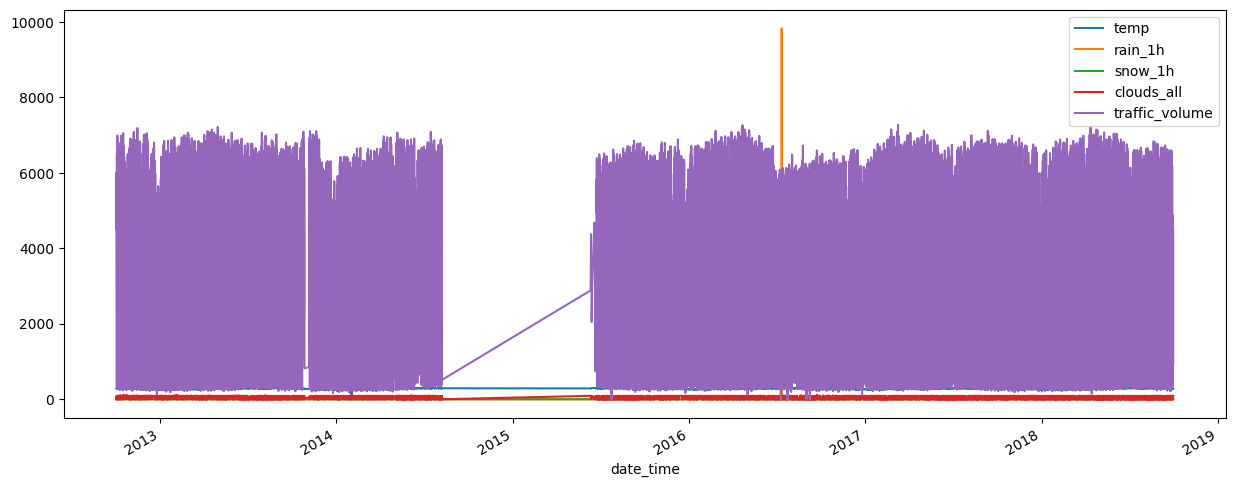

In [ ]:
df.plot(figsize=(15, 6))
plt.show()

<Axes: xlabel='date_time'>

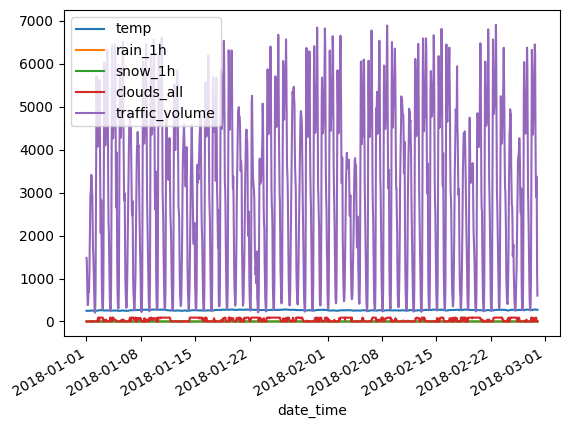

In [ ]:
df['2018-01-01 00:00':'2018-02-28 00:00'].plot()

<Axes: ylabel='Frequency'>

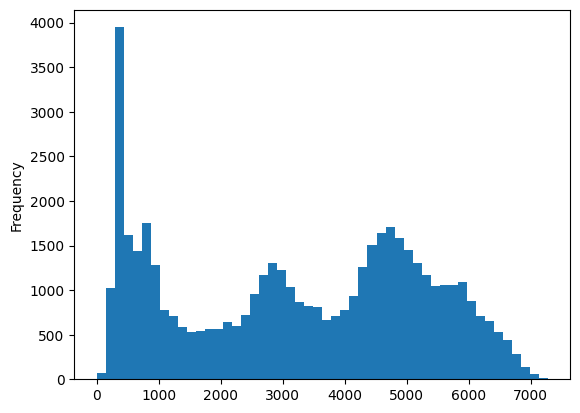

In [ ]:
# What is the usual traffic?
df['traffic_volume'].plot.hist(bins=50)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 48204 non-null  float64
 1   rain_1h              48204 non-null  float64
 2   snow_1h              48204 non-null  float64
 3   clouds_all           48204 non-null  int64  
 4   weather_main         48204 non-null  object 
 5   weather_description  48204 non-null  object 
 6   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 3.9+ MB


In [ ]:
df['weather_main'].value_counts()

,count
weather_main,
Clouds,15164
Clear,13391
Mist,5950
Rain,5672
Snow,2876
Drizzle,1821
Haze,1360
Thunderstorm,1034
Fog,912


In [ ]:
df['clouds_all'].value_counts()

,count
clouds_all,
90,16442
1,12761
75,5069
40,3993
0,1988
20,1849
64,1558
5,1094
92,776


In [ ]:
df_daily =  df.resample('D').agg({
    'traffic_volume': 'mean',
    'clouds_all	': 'mean',
    'rain_1h': pd.Series.max,
    'snow_1h': pd.Series.max,
    'temp': 'mean',
    'weather_main': lambda x: x.mode()[0],
    'weather_description': lambda x: x.mode()[0]
})

KeyError: "Column(s) ['clouds_all\\t'] do not exist"

In [ ]:
df_daily = df.resample('D').agg({
    'traffic_volume': 'mean',
    'clouds_all': 'mean',
    'rain_1h': pd.Series.max,
    'snow_1h': pd.Series.max,
    'temp': 'mean',
    'weather_main': lambda x: x.mode().iloc[0] if not x.mode().empty else None,  # Handle empty mode results
    'weather_description': lambda x: x.mode().iloc[0] if not x.mode().empty else None   # Handle empty mode results
})

<Axes: xlabel='date_time'>

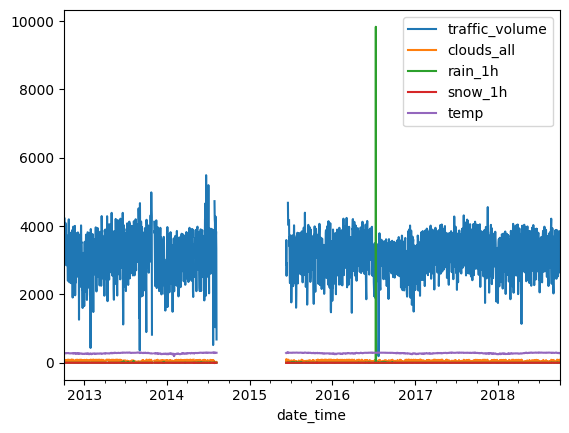

In [ ]:
df_daily.plot()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attem

<Axes: xlabel='date_time'>

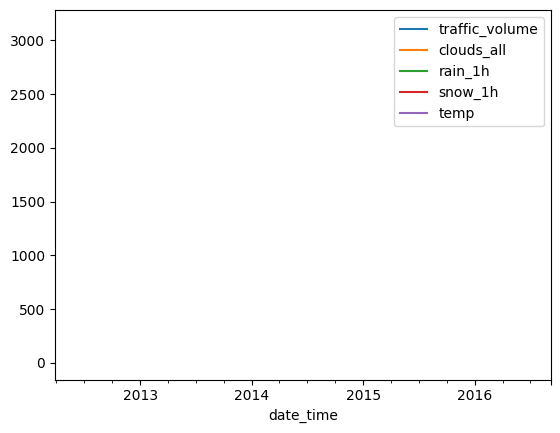

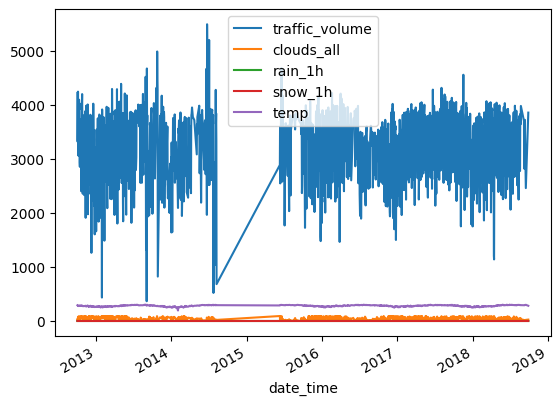

In [ ]:
df_daily[df_daily['rain_1h'] == 1].plot()
df_daily[df_daily['rain_1h'] == 0].plot()

In [ ]:
df_daily['snow_1h'].nunique()

5

In [ ]:
df_daily['rain_1h'].nunique()

155